Arbitrary N x N optical signal processor 

In [1]:
import numpy as np
import matplotlib.pylab as plt
import copy

# add angler to path (not necessary if pip installed)
import sys
sys.path.append("..")

# import the main simulation and optimization classes
from angler import Simulation, Optimization

# import some structure generators
from angler.structures import three_port, two_port, N_port, N_IO_port

%load_ext autoreload
%autoreload 2
%matplotlib inline

Define simulation constants ==> L0 is default 1 micron

In [2]:
lambda0 = 1.55e-6              # free space wavelength (m)
c0 = 3e8                    # speed of light in vacuum (m/s)
omega = 2*np.pi*c0/lambda0  # angular frequency (2pi/s)
dl = 0.05                  # grid size (L0)
NPML = [20, 20]             # number of pml grid points on x and y borders
pol = 'Ez'                  # polarization (either 'Hz' or 'Ez')
source_amp = 1e-9           # amplitude of modal source (make around 1 for nonlinear effects)

In [3]:
# define material constants
n_index = 2.8              # refractive index
eps_m = n_index**2          # relative permittivity

Inputs = AE features MNIST, Outputs = MNIST classes 

In [4]:
# geometric parameters for a 1 -> 2 port device
L = 20     # length of box (L0) = micron 
N = 10         # Num output ports 
H = 20    # height of box (L0)
w = .5        # width of waveguides (L0)
d = H/10     # distance between waveguides (L0)
l = 5         # length of waveguide from PML to box (L0)
spc = 3       # space between box and PML (L0)

Definition of Simulation Object 

Computed a domain with 640 grids in x and 560 grids in y
The simulation has 30 grids per free space wavelength


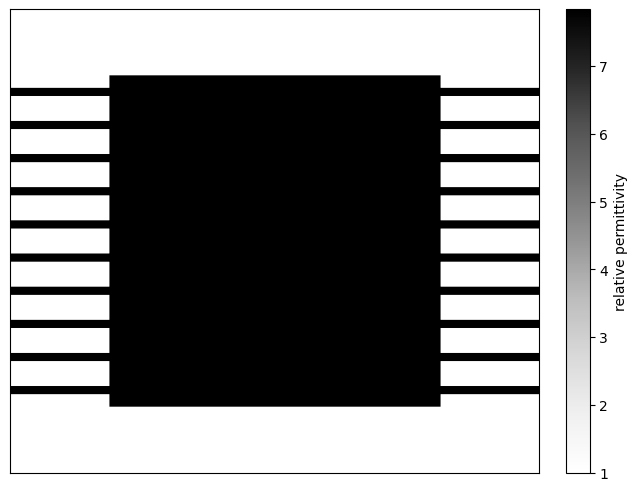

In [5]:
# define permittivity of three port system
eps_r, design_region = N_IO_port(N, L, H, w, d, l, spc, dl, NPML, eps_m)
(Nx, Ny) = eps_r.shape
nx, ny = int(Nx/2), int(Ny/2)            # halfway grid points

# make a new simulation object
simulation = Simulation(omega, eps_r, dl, NPML, pol)

print("Computed a domain with {} grids in x and {} grids in y".format(Nx,Ny))
print("The simulation has {} grids per free space wavelength".format(int(lambda0/dl/simulation.L0)))

# plot the permittivity distribution
simulation.plt_eps(outline=False)
plt.show()

Sample input source 

In [6]:
# i = 9 # Waveguide num (start at 0)
# y_i =  # Waveguide y-pos
for i in range(N):
    # set the input waveguide modal source
    simulation.add_mode(neff=np.sqrt(eps_m), direction_normal='x', center=[NPML[0]+int(l/2/dl), ny-((float(i)-float(N-1)/2.0)*d/dl + w)], width=int(H/13/dl), scale=source_amp)
srcs = simulation.setup_modes()

print(srcs)



Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
[array([[-2.76016023e-12+0.j, -2.76016023e-12+0.j, -3.39847484e-12+0.j,
        -4.82272068e-12+0.j, -7.36226883e-12+0.j, -1.16044152e-11+0.j,
        -1.85301983e-11+0.j, -2.97412749e-11+0.j, -4.78303181e-11+0.j,
        -7.69805999e-11+0.j, -1.23933414e-10+0.j, -1.99547067e-10+0.j,
        -2.65159376e-10+0.j, -3.17481836e-10+0.j, -3.53892033e-10+0.j,
        -3.72565080e-10+0.j, -3.72565080e-10+0.j, -3.53892033e-10+0.j,
        -3.17481836e-10+0.j, -2.65159376e-10+0.j, -1.99547067e-10+0.j,
        -1.23933414e-10+0.j, -7.69805999e-11+0.j, -4.78303181e-11+0.j,
        -2.97412749e-11+0.j, -1.85301983e-11+0.j, -1.16044152e-11+0.j,
        -7.36226883e-12+0.j, -4.82272068e-12+0.j, -3.39847484e-12+0.j]]), array([[-2.76016023e-12+0.j, -2.7601

Add modal profiles for auto-diff

In [34]:

# # make a new simulation to get the modal profile of the top output port
# top = Simulation(omega, eps_r, dl, NPML, 'Ez')
# top.add_mode(neff=np.sqrt(eps_m), direction_normal='x', center=[-NPML[0]-int(l/2/dl), ny+int(d/2/dl)], width=int(1/dl))
# top.setup_modes()
# J_top = np.abs(top.src)

# # make a new simulation to get the modal profile of the bottom output port
# bot = Simulation(omega, eps_r, dl, NPML, 'Ez')
# bot.add_mode(neff=np.sqrt(eps_m), direction_normal='x', center=[-NPML[0]-int(l/2/dl), ny-int(d/2/dl)], width=int(1/dl))
# bot.setup_modes()
# J_bot = np.abs(bot.src)



wg_width_px = int(w/dl)

print(dl*wg_width_px/2)

i = 0
print(ny-((float(i)-float(N-1)/2.0)*d/dl + w))
print(int(H/13/dl))

destination = simulation.src
width= int(H/13/dl)

center_0 = [NPML[0]+int(l/2/dl), ny-((float(i)-float(N-1)/2.0)*d/dl + w)]

inds_x_0 = [center_0[0], center_0[0]+1]
inds_y_0 = [int(center_0[1]-width/2), int(center_0[1]+width/2)]

i = 1
center_1 = [NPML[0]+int(l/2/dl), ny-((float(i)-float(N-1)/2.0)*d/dl + w)]

inds_x_1 = [center_1[0], center_1[0]+1]
inds_y_1 = [int(center_1[1]-width/2), int(center_1[1]+width/2)]


src_0 = srcs[0].reshape((1, -1))*10
src_1 = srcs[1].reshape((1, -1))*5
print(src_0)
print(srcs[0])
destination[inds_x_0[0]:inds_x_0[1], inds_y_0[0]:inds_y_0[1]] = np.abs(src_0[0])*np.sign(np.real(src_0[0]))
destination[inds_x_1[0]:inds_x_1[1], inds_y_1[0]:inds_y_1[1]] = np.abs(src_1[0])*np.sign(np.real(src_1[0]))


0.25
459.5
30
[[-2.76016023e-11+0.j -2.76016023e-11+0.j -3.39847484e-11+0.j
  -4.82272068e-11+0.j -7.36226883e-11+0.j -1.16044152e-10+0.j
  -1.85301983e-10+0.j -2.97412749e-10+0.j -4.78303181e-10+0.j
  -7.69805999e-10+0.j -1.23933414e-09+0.j -1.99547067e-09+0.j
  -2.65159376e-09+0.j -3.17481836e-09+0.j -3.53892033e-09+0.j
  -3.72565080e-09+0.j -3.72565080e-09+0.j -3.53892033e-09+0.j
  -3.17481836e-09+0.j -2.65159376e-09+0.j -1.99547067e-09+0.j
  -1.23933414e-09+0.j -7.69805999e-10+0.j -4.78303181e-10+0.j
  -2.97412749e-10+0.j -1.85301983e-10+0.j -1.16044152e-10+0.j
  -7.36226883e-11+0.j -4.82272068e-11+0.j -3.39847484e-11+0.j]]
[[-2.76016023e-12+0.j -2.76016023e-12+0.j -3.39847484e-12+0.j
  -4.82272068e-12+0.j -7.36226883e-12+0.j -1.16044152e-11+0.j
  -1.85301983e-11+0.j -2.97412749e-11+0.j -4.78303181e-11+0.j
  -7.69805999e-11+0.j -1.23933414e-10+0.j -1.99547067e-10+0.j
  -2.65159376e-10+0.j -3.17481836e-10+0.j -3.53892033e-10+0.j
  -3.72565080e-10+0.j -3.72565080e-10+0.j -3.53892033e

Simulate E-field propagation and plot

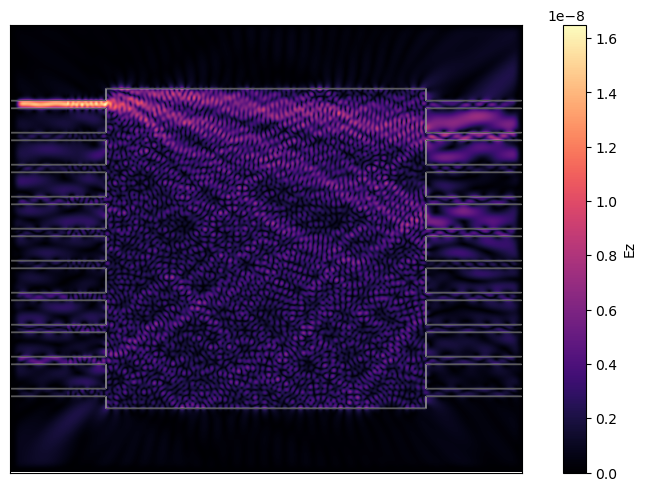

In [35]:
# set source and solve for electromagnetic fields
(Hx, Hy, Ez) = simulation.solve_fields()
simulation.plt_abs(outline=True, cbar=True);
# plt.xlim((nx - 2*l*L), (nx + 2*l*L))
# plt.ylim((ny - 2*l*H), (ny + 2*l*H))
# plt.show()
# print(np.real(Ez))


Design region 

In [ ]:
simulation.init_design_region(design_region, eps_m, style='halfway')
simulation.plt_eps(outline=False)
plt.show()

In [ ]:
(Hx, Hy, Ez) = simulation.solve_fields()
simulation.plt_abs(outline=True, cbar=True);
plt.xlim((nx - 2*l*L), (nx + 2*l*L))
plt.ylim((ny - 2*l*H), (ny + 2*l*H))
plt.show()